# Import the packages

In [218]:
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, classification_report 
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics, tree
import timeit
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

# Load and Prepare the dataset

In [56]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [57]:
#Returns the column types
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [58]:
#Returns the desciptive statistics
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Visualisation

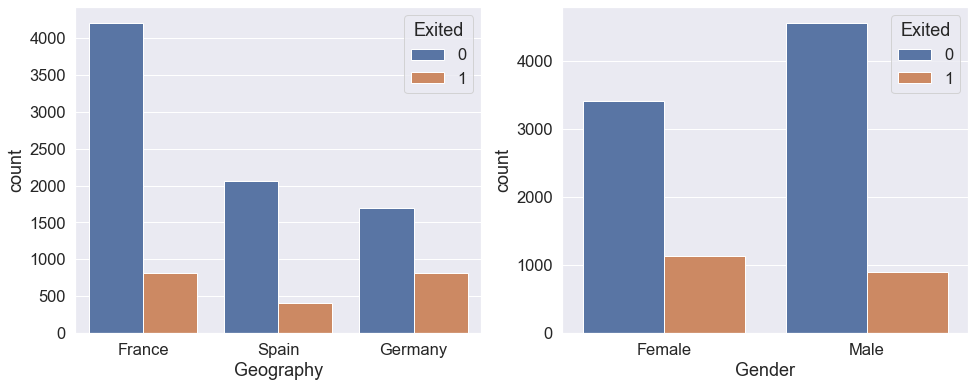

In [59]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
sns.set(font_scale=1.5)
sns.countplot(data=dataset,x='Geography',hue='Exited',ax=ax[0])
sns.countplot(data=dataset,x='Gender',hue='Exited',ax=ax[1])
plt.show()

# Splitting the target and the predictor variables

In [60]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [61]:
#Predictor variables
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [62]:
#Response/Target variable
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

# Encoding Categorical Data

In [63]:
# Encoding categorical data - Gender column
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [64]:
# Encoding categorical data - Geography column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

# Splitting the dataset into train and test set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#Considering the train subset and creating validation set from the same.
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Feature Scaling

In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

# CO 1: Performance Enhancement - Ensemble Techniques

In [67]:
#Basic python function to print the metrics 
def evaluate_model(clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc_test = accuracy_score(y_test,y_pred)
    print(clf.__class__.__name__,": ")
    print('Accuracy of test set:', acc_test)
    return acc_test

# Hard Voting

In [68]:
tree_clf = DecisionTreeClassifier(random_state=1)
logistic_clf = LogisticRegression(random_state=1)
svc_clf = SVC(probability=True,random_state=1)

In [69]:
estimators = [
    ('Decision Tree', tree_clf),
    ('Logistic Regression',logistic_clf),
    ('Support Vector Classifier',svc_clf)
]

voting_clf = VotingClassifier(estimators, voting='hard')

In [70]:
all_estimators = estimators + [('Voting classifier', voting_clf)]

results = {
    'model': [],
    'accuracy_test_set': []
}

In [71]:
for (name,clf) in all_estimators:
    acc_test = evaluate_model(clf)
    results['model'].append(name)
    results['accuracy_test_set'].append(acc_test)
    print("------------------------------------------")

DecisionTreeClassifier : 
Accuracy of test set: 0.7995
------------------------------------------
LogisticRegression : 
Accuracy of test set: 0.8125
------------------------------------------
SVC : 
Accuracy of test set: 0.862
------------------------------------------
VotingClassifier : 
Accuracy of test set: 0.855
------------------------------------------


In [72]:
results

{'model': ['Decision Tree',
  'Logistic Regression',
  'Support Vector Classifier',
  'Voting classifier'],
 'accuracy_test_set': [0.7995, 0.8125, 0.862, 0.855]}

In [73]:
results_df = pd.DataFrame(results)
results_df

,model,accuracy_test_set
0,Decision Tree,0.7995
1,Logistic Regression,0.8125
2,Support Vector Classifier,0.8620
3,Voting classifier,0.8550


# Bagging

In [74]:
bag_clf = BaggingClassifier(
    LogisticRegression(random_state=1),
    n_estimators=100,
    max_samples=0.75,
    bootstrap=True,
    random_state=1,
    n_jobs=-1)
acc_train_bag = evaluate_model(bag_clf)

BaggingClassifier : 
Accuracy of test set: 0.812


# Boosting

In [75]:
#Boosting (Adaboost)
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=1),
    n_estimators=500,
    learning_rate=0.05,
    random_state=1
)
acc_train_ada = evaluate_model(ada_clf)

AdaBoostClassifier : 
Accuracy of test set: 0.8565


In [76]:
#Boosting (Gradient Boosting)
gbct_clf = GradientBoostingClassifier(
    max_depth=1,
    n_estimators=500,
    learning_rate=0.05,
    random_state=1)
acc_train_gbct = evaluate_model(gbct_clf)

GradientBoostingClassifier : 
Accuracy of test set: 0.8545


# Hyperparameter tuning

In [182]:
from sklearn.ensemble import RandomForestClassifier
rf_1 = RandomForestClassifier(random_state=0, n_estimators=10)
rf_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [183]:
rf_2 = RandomForestClassifier(random_state=0, n_estimators=50)
rf_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [184]:
rf_3 = RandomForestClassifier(random_state=0, n_estimators=100)
rf_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [185]:
# combine all three Voting Ensembles
estimators = [('rf_1', rf_1), ('rf_2', rf_2), ('rf_3', rf_3)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
print("rf_1.score: ", rf_1.score(X_test, y_test))
print("rf_2.score: ", rf_2.score(X_test, y_test))
print("rf_3.score: ", rf_3.score(X_test, y_test))
print("ensemble.score: ", ensemble.score(X_test, y_test))

rf_1.score:  0.8525
rf_2.score:  0.862
rf_3.score:  0.8595
ensemble.score:  0.859


# K fold Cross Validation

In [186]:
#Defining the machine learning models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth = 2)
model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model5 = GaussianNB()

In [187]:
#Training the machine learning models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [188]:
#Making the prediction
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

In [189]:
y_pred1
y_pred2
y_pred3
y_pred4
y_pred5

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [190]:
#Confusion matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred1)
cm_DecisionTree = confusion_matrix(y_test, y_pred2)
cm_SupportVectorClass = confusion_matrix(y_test, y_pred3)
cm_KNN = confusion_matrix(y_test, y_pred4)
cm_NaiveBayes = confusion_matrix(y_test, y_pred5)

In [191]:
cm_LogisticRegression

array([[1533,   52],
       [ 323,   92]], dtype=int64)

In [192]:
cm_DecisionTree

array([[1474,  111],
       [ 233,  182]], dtype=int64)

In [193]:
cm_SupportVectorClass

array([[1557,   28],
       [ 248,  167]], dtype=int64)

In [194]:
cm_KNN

array([[1510,   75],
       [ 274,  141]], dtype=int64)

In [195]:
cm_NaiveBayes

array([[1500,   85],
       [ 263,  152]], dtype=int64)

In [196]:
#10-fold cross-validation 
kfold = model_selection.KFold(n_splits=10, random_state = 0, shuffle=True)
result1 = model_selection.cross_val_score(model1, X_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(model2, X_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(model3, X_train, y_train, cv=kfold)
result4 = model_selection.cross_val_score(model4, X_train, y_train, cv=kfold)
result5 = model_selection.cross_val_score(model5, X_train, y_train, cv=kfold)

In [197]:
#Printing the accuracies achieved in cross-validation
print('Accuracy of Logistic Regression Model = ',result1.mean())
print('Accuracy of Decision Tree Model = ',result2.mean())
print('Accuracy of Support Vector Machine = ',result3.mean())
print('Accuracy of k-NN Model = ',result4.mean())
print('Accuracy of Naive Bayes Model = ',result5.mean())

Accuracy of Logistic Regression Model =  0.811625
Accuracy of Decision Tree Model =  0.830125
Accuracy of Support Vector Machine =  0.8552500000000001
Accuracy of k-NN Model =  0.8254999999999999
Accuracy of Naive Bayes Model =  0.819375


# Ensemble Training

In [198]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []
#Defining 8 Logistic Regression Models
model1_1 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model1_1))
model1_2 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model1_2))
model1_3 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic3', model1_3))
model1_4 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic4', model1_4))
model1_5 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic5', model1_5))
model1_6 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic6', model1_6))
model1_7 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic7', model1_7))
model1_8 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic8', model1_8))

In [199]:
#Defining 8 Decision Tree Classifiers
model2_1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model2_1))
model2_2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2_2))
model2_3 = DecisionTreeClassifier(max_depth = 5)
estimators.append(('cart3', model2_3))
model2_4 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart4', model2_4))
model2_5 = DecisionTreeClassifier(max_depth = 6)
estimators.append(('cart5', model2_5))
model2_6 = DecisionTreeClassifier(max_depth = 7)
estimators.append(('cart6', model2_6))
model2_7 = DecisionTreeClassifier(max_depth = 8)
estimators.append(('cart7', model2_7))
model2_8 = DecisionTreeClassifier(max_depth = 9)
estimators.append(('cart8', model2_8))

In [200]:
#Defining 8 Support Vector Classifiers
model3_1 = SVC(kernel = 'linear')
estimators.append(('svm1', model3_1))
model3_2 = SVC(kernel = 'poly')
estimators.append(('svm2', model3_2))
model3_3 = SVC(kernel = 'rbf')
estimators.append(('svm3', model3_3))
model3_4 = SVC(kernel = 'rbf')
estimators.append(('svm4', model3_4))
model3_5 = SVC(kernel = 'linear')
estimators.append(('svm5', model3_5))
model3_6 = SVC(kernel = 'linear')
estimators.append(('svm6', model3_6))
model3_7 = SVC(kernel = 'linear')
estimators.append(('svm7', model3_7))
model3_8 = SVC(kernel = 'linear')
estimators.append(('svm8', model3_8))

In [201]:
#Defining 8 K-NN classifiers
model4_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model4_1))
model4_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn2', model4_2))
model4_3 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn3', model4_3))
model4_4 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
estimators.append(('knn4', model4_4))
model4_5 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 1)
estimators.append(('knn5', model4_5))
model4_6 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 1)
estimators.append(('knn6', model4_6))
model4_7 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
estimators.append(('knn7', model4_7))
model4_8 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
estimators.append(('knn8', model4_8))

In [202]:
#Defining 8 Naive Bayes classifiers
model5_1 = GaussianNB()
estimators.append(('nbs1', model5_1))
model5_2 = GaussianNB()
estimators.append(('nbs2', model5_2))
model5_3 = GaussianNB()
estimators.append(('nbs3', model5_3))
model5_4 = GaussianNB()
estimators.append(('nbs4', model5_4))
model5_5 = GaussianNB()
estimators.append(('nbs5', model5_5))
model5_6 = GaussianNB()
estimators.append(('nbs6', model5_6))
model5_7 = GaussianNB()
estimators.append(('nbs7', model5_7))
model5_8 = GaussianNB()
estimators.append(('nbs8', model5_8))

In [203]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [204]:
#Confusion matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)

In [205]:
#Cross-Validation
import time 
start = time.time()
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
kfold
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())
stop=time.time()
print(stop-start)

0.834625
65.47870135307312


# CO 2: Tree Based Learning Methods

# Random Forest Classifier

In [78]:
#creating an instance of classifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,\
                                    criterion = 'entropy', max_leaf_nodes= 20,oob_score = True, n_jobs = -1 )
# fit the model
model_RF = classifier.fit(X_train, y_train)

In [79]:
# train accuracy
acc_random_forest = round(classifier.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

85.71 %


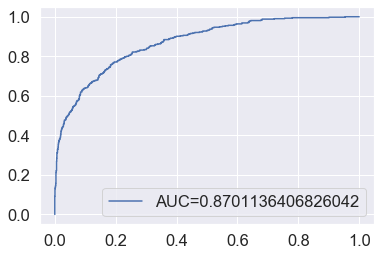

In [80]:
#ROC curve & AUC
y_pred_proba = model_RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [81]:
#predict the model
y_pred_RF = model_RF.predict(X_test)

#Evaluate
evaluation_scores = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_RF)})

print(evaluation_scores)

Model               Random Forest Classifier 
ROC Score                            0.660328
Precision Score                      0.901316
Recall Score                          0.33012
Accuracy Score                         0.8535
dtype: object


In [82]:
#Accuracy of Test set
acc_random_forest = round(classifier.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

85.35 %


In [83]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1585
           1       0.90      0.33      0.48       415

    accuracy                           0.85      2000
   macro avg       0.88      0.66      0.70      2000
weighted avg       0.86      0.85      0.83      2000



In [84]:
confusion_matrix(y_test,y_pred_RF)

array([[1570,   15],
       [ 278,  137]], dtype=int64)

# Feature Importance

In [85]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:10] # this will get you top 10 features

# Print the feature ranking
print("Feature ranking:")
for f in range(top_k):
    print("%d. feature %d (%f)" % (f + 1, new_indices[f], importances[new_indices[f]]))

Feature ranking:
1. feature 5 (0.422842)
2. feature 8 (0.293555)
3. feature 10 (0.094005)
4. feature 7 (0.065258)
5. feature 1 (0.056412)
6. feature 3 (0.017629)
7. feature 4 (0.016082)
8. feature 0 (0.015073)
9. feature 11 (0.009607)
10. feature 2 (0.005738)


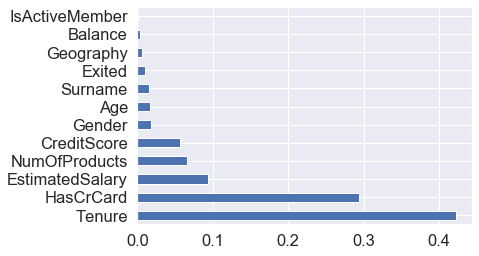

In [86]:
columns_ = dataset.iloc[:,2:].columns
feature_importances = pd.Series(classifier.feature_importances_, index=columns_)
feature_importances.nlargest(14).plot(kind='barh') #top 10 features

# Decision Tree Hyperparameter

In [116]:
clf = dt()

In [118]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')

In [119]:
scores.mean()

0.680864765723262

In [121]:
# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [122]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [126]:
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.5011600928074246


In [127]:
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[2,3,4,5], 'criterion' : ['gini','entropy']}
scorer = make_scorer(f1_score)

In [128]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

In [130]:
grid_fit = grid_obj.fit(X_train, y_train)

In [131]:
best_clf = grid_fit.best_estimator_

In [132]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [134]:
scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='f1_macro')
scores.mean()

0.738192974194888

In [135]:
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

The training F1 Score is 0.5911401597676108
The testing F1 Score is 0.5872340425531914


# CO 3: Dimensionality Reduction

# Principal Component Analysis (PCA)

In [87]:
# Creating a pipeline to obtain principal components for Elbow rule
pipe = Pipeline([('scaler',StandardScaler()),('reducer',PCA())])
pc = pipe.fit_transform(X_test)

In [88]:
# Print principal components
pc

array([[-1.73491694e+00, -1.69791129e-01,  2.14074096e-01, ...,
         5.98693929e-01, -2.83805642e-01,  2.45777533e-14],
       [-4.15259288e-01, -1.15189104e+00, -1.31931477e+00, ...,
         5.41612522e-01,  6.22401272e-01, -9.18778237e-16],
       [-1.72806517e+00, -1.11202932e-01,  8.92648491e-01, ...,
        -9.57418756e-02, -2.59284318e-01,  4.25167191e-17],
       ...,
       [-2.01723889e-01,  2.68237345e+00,  1.49462782e-01, ...,
        -3.25687889e-01, -3.55461402e-01,  8.65123291e-17],
       [ 1.57277804e+00, -7.05230784e-01,  1.84679132e+00, ...,
        -1.17854913e+00, -3.07298996e-01,  7.81140167e-17],
       [ 2.21817854e+00, -1.18312414e+00, -8.22493742e-01, ...,
        -1.62204044e-01, -3.88095292e-01,  9.49487984e-17]])

In [89]:
# Obtained variances for scree plot
variances = pipe.steps[1][1].explained_variance_ratio_*100
variances

array([1.56045844e+01, 1.22676381e+01, 9.42151983e+00, 9.10183081e+00,
       8.71494996e+00, 8.53433057e+00, 8.43784069e+00, 8.22503301e+00,
       7.64561971e+00, 7.37463267e+00, 4.67202025e+00, 2.59612770e-30])

In [90]:
# Cumulative sum of variances
np.cumsum(variances)

array([ 15.60458437,  27.87222248,  37.29374232,  46.39557313,
        55.11052309,  63.64485366,  72.08269435,  80.30772737,
        87.95334708,  95.32797975, 100.        , 100.        ])

In [93]:
# Components
pipe.steps[1][1].components_

array([[-6.29239138e-01,  5.63952602e-01,  1.70490919e-01,
         2.34538690e-02, -2.71083110e-02,  8.27055711e-02,
        -1.87894218e-02,  4.67849538e-01, -1.68305697e-01,
         3.47904338e-04, -2.24848359e-02,  2.74687180e-02],
       [-3.72246054e-01, -3.57004059e-01,  7.81090751e-01,
        -3.84122543e-02,  1.10046162e-02, -1.06813498e-02,
         4.38772146e-02, -3.19272840e-01,  9.54657003e-02,
        -3.58528362e-02,  6.44753231e-03,  8.86931168e-02],
       [-1.56536133e-01,  3.16740584e-01, -1.31376595e-01,
        -8.99451521e-02, -4.27986961e-01, -1.43963128e-01,
         4.72544090e-03, -2.88877390e-01,  7.20679633e-01,
         1.21994445e-01, -1.67200026e-01,  1.52832629e-02],
       [-5.16822622e-02,  7.86742149e-02, -1.78639987e-02,
         7.44409771e-02,  8.60640991e-02,  4.64082167e-01,
        -2.23652203e-01, -9.84791690e-02,  2.67617103e-01,
        -1.92961277e-01,  6.98258866e-01, -3.26132757e-01],
       [ 7.61595225e-02, -4.96897379e-02, -3.8923614

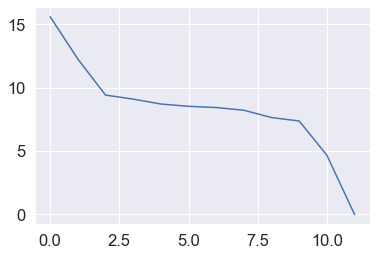

In [94]:
# Scree plot, elbow rule
plt.plot(variances)

# CO 4: Artificial Neural Network

# Linear Classification Perceptron

In [160]:
model = Perceptron()
# define model evaluation method : Cross Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.740 (0.038)


In [162]:
model.fit(X_train, y_train)
# make a prediction
pred = model.predict(X_test)
# summarize prediction
print('Predicted Class:', pred)

Predicted Class: [0 0 0 ... 0 0 1]


# ANN

In [95]:
# Building the ANN

# Initializing the ANN
ann = tf.keras.models.Sequential()

In [96]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [97]:
# Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.6338 - accuracy: 0.6695
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7993
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4304 - accuracy: 0.8119
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8294
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8415
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3798 - accuracy: 0.8475
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.8526
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3606 - accuracy: 0.8547
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3553 - accura

In [98]:
# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [99]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1529,   56],
       [ 215,  200]], dtype=int64)

In [100]:
accuracy_score(y_test, y_pred)

0.8645

# CO 5: Case Study on Model Selection

# XGBoost

In [172]:
xgbc = XGBClassifier(random_state=1,use_label_encoder=False,verbosity=0,tree_method='hist')

In [173]:
xgbcscores = cross_val_score(xgbc,X_train,y_train,cv=5,scoring='f1')

In [174]:
np.mean(xgbcscores)

0.5760811218380262

In [175]:
# XGBoost Classifier Tuning
tic=timeit.default_timer()
paramsxgbc = {
    "learning_rate": [0.001,0.01,0.1,0.3],
    "max_depth":[5,8,10],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[50,150,500],
    'scale_pos_weight':[1,2,3,4],
    'objective': ['binary:logistic','reg:logistic']
    }

In [176]:
randomsearchcv_xgbc = RandomizedSearchCV(xgbc,param_distributions=paramsxgbc,cv=5,scoring='f1',random_state=1)
randomsearchcv_xgbc.fit(X_train,y_train)
toc=timeit.default_timer()
print('Time taken to tune XGBoost: {}'.format(toc-tic))

Time taken to tune XGBoost: 59.556017899999915


In [177]:
best_paramsxgbc = randomsearchcv_xgbc.best_params_
best_scorexgbc = randomsearchcv_xgbc.best_score_
modelxgbc = randomsearchcv_xgbc.best_estimator_

In [178]:
print('Best xgbc model f1 score:',round(best_scorexgbc,3),"\n")
print('Best xgbc parameters')
for k,v in best_paramsxgbc.items():
    print(k,":",v)

Best xgbc model f1 score: 0.606 

Best xgbc parameters
subsample : 1.0
scale_pos_weight : 4
objective : reg:logistic
n_estimators : 50
max_depth : 10
learning_rate : 0.1


In [179]:
predictions = modelxgbc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 85.95%


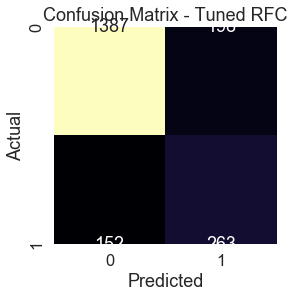

In [180]:
confusionmatrix = pd.crosstab(y_test,predictions,rownames=['Actual'],colnames=['Predicted'])

fig,ax = plt.subplots(1,1,figsize=(4,4))
sns.set(font_scale=1.5)
sns.heatmap(confusionmatrix,annot=True,fmt='g',cmap='magma',cbar=False,ax=ax)
ax.title.set_text('Confusion Matrix - Tuned RFC')
plt.show()

In [181]:
truepositive = confusionmatrix[1][1]
truenegative = confusionmatrix[0][0]
falsepositive = confusionmatrix[1][0]
falsenegative = confusionmatrix[0][1]

precision = truepositive/(truepositive+falsepositive)
recall = truepositive/(truepositive+falsenegative)

print('Precision:{} \nRecall:{}'.format(round(precision,3),round(recall,3)))

Precision:0.57 
Recall:0.634


# Stacking

In [220]:
# The base learners
base_learner_1 = LogisticRegression()
base_learner_2 = KNeighborsClassifier(n_neighbors=1)
base_learner_3 = DecisionTreeClassifier()

# The meta-learner
meta_learner = GaussianNB()

In [222]:
# Now we train a list of models
result_1 = base_learner_1.fit(X_train, y_train)
result_2 = base_learner_2.fit(X_train, y_train)
result_3 = base_learner_3.fit(X_train, y_train)

In [223]:
# We then use the models to make predictions and create a new stacked dataset
predicted_1 = result_1.predict(X_train)
predicted_2 = result_2.predict(X_train)
predicted_3 = result_3.predict(X_train)

In [224]:
prediction_stack = np.dstack([predicted_1, predicted_2, predicted_3])

# Now we stack the actual outcomes i.e. Y_Test with the prediction_stack
final_stack = np.dstack([prediction_stack, y_train])

In [225]:
final_stack

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 1],
        ...,
        [0, 1, 1, 1],
        [0, 0, 0, 0],
        [0, 1, 1, 1]]], dtype=int64)

In [226]:
stacked_dataframe = pd.DataFrame(final_stack[0,0:21000], columns='LR KNN DT Y_TRAIN'.split())
stacked_dataframe.head(5)

,LR,KNN,DT,Y_TRAIN
0,0,0,0,0
1,0,0,0,0
2,0,1,1,1
3,0,0,0,0
4,0,0,0,0


In [227]:
stacked_dataframe

,LR,KNN,DT,Y_TRAIN
0,0,0,0,0
1,0,0,0,0
2,0,1,1,1
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,1,1,1
9,0,0,0,0


In [229]:
# BASE LEARNER 1
result_1 = base_learner_1.fit(X_train, y_train)
predicted_1 = result_1.predict(X_test)
base_learner_1.score(X_test,y_test)

0.8125

In [231]:
# BASE LEARNER 2
result_2 = base_learner_2.fit(X_train, y_train)
predicted_2 = result_2.predict(X_test)
base_learner_2.score(X_test,y_test)

0.8035

In [232]:
# BASE LEARNER 3
result_3 = base_learner_3.fit(X_train, y_train)
predicted_3 = result_3.predict(X_test)
base_learner_3.score(X_test,y_test)

0.7955

In [235]:
for learners, label in zip([base_learner_1, base_learner_2, base_learner_3], 
                      ['Logistic Regression', 
                       'KNN', 
                       'Decision Tree']):
    learners.fit(X_train, y_train)
    scores = learners.score(X_train, y_train)
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.81 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [KNN]
Accuracy: 1.00 (+/- 0.00) [Decision Tree]


In [236]:
# Predicted results
prediction_from_base_learner_1 = base_learner_1.predict(X_test)
prediction_from_base_learner_2 = base_learner_2.predict(X_test)
prediction_from_base_learner_3 = base_learner_3.predict(X_test)

In [237]:
type(prediction_from_base_learner_1)

numpy.ndarray

In [238]:
prediction_stack = np.dstack([prediction_from_base_learner_1, prediction_from_base_learner_2, prediction_from_base_learner_3])

In [240]:
# Now we stack the actual outcomes i.e. Y_Test with the prediction_stack
final_stack = np.dstack([prediction_stack, y_test])

In [241]:
final_stack

array([[[0, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 0, 0]]], dtype=int64)

In [242]:
stacked_dataframe = pd.DataFrame(final_stack[0,0:9000], columns='LR KNN DT Y_TEST'.split())
stacked_dataframe.head(5)

,LR,KNN,DT,Y_TEST
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [243]:
stacked_dataframe

,LR,KNN,DT,Y_TEST
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,1,0,0
7,0,0,0,0
8,1,1,0,0
9,0,0,0,0
